### Note on Skipped SQL Queries
Some queries in the `sql/` folder use PostgreSQL-specific functions 
or tables that are not present in the SQLite database. 
They are skipped in this notebook, but exploratory visualizations 
are created based on the available `train` table.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", palette="muted")





In [8]:
import sqlite3
import pandas as pd
from pathlib import Path

db_path = Path("..") / "data" / "titanic.db"
conn = sqlite3.connect(db_path)

train_df = pd.read_csv("C:\\Users\\Акылай\\OneDrive\\Desktop\\my git\\titanic\\data\\raw\\train.csv")

train_df.to_sql(
    "train",
    conn,
    if_exists="replace",
    index=False
)


891

In [9]:
pd.read_sql(
    "SELECT COUNT(*) AS rows_count FROM train",
    conn
     )


,rows_count
0,891


In [11]:
from pathlib import Path
import pandas as pd

sql_dir = Path("..") / "sql"

for sql_file in sql_dir.glob("*.sql"):
    query = sql_file.read_text()

    try:
        df = pd.read_sql(query, conn)
    except Exception as e:
        print(f"Skipped {sql_file.name}: {e}")
        continue

    display(df.head())



Skipped avg_median_purchase.sql: Execution failed on sql '--РЎСЂРµРґРЅРёР№ Рё РјРµРґРёР°РЅРЅС‹Р№ С‡РµРє 
select "PassengerId" ,
AVG(amount) as avg_amount,
PERCENTILE_CONT(0.5) within group (order by amount) as median_amount
from titanic.purchases
group by "PassengerId";
': near "(": syntax error
Skipped category_avg_spent.sql: Execution failed on sql '--РЎСЂРµРґРЅСЏСЏ СЃСѓРјРјР° Р·Р°С‚СЂР°С‡РµРЅРЅР°СЏ РїРѕ РєР°С‚РµРіРѕСЂРёСЏРј РєР»Р°СЃСЃ Рё РїРѕР»
select
    t."Sex",
    t."Pclass",
round(avg(p.amount), 2) as avg_spend
from titanic.titanic t
left join titanic.purchases p
    on t."PassengerId" = p."PassengerId"
group by t."Sex", t."Pclass"
order by t."Sex", t."Pclass";
': no such table: titanic.titanic
Skipped category_spent.sql: Execution failed on sql '--Р Р°СЃСЃС‡РµС‚ РґР»СЏ РєР°Р¶РґРѕРіРѕ РїР°СЃСЃР°Р¶РёСЂР° СЃ РєР°С‚РµРіРѕСЂРёСЏРјРё РїРѕ С‚СЂР°С‚Р°Рј
with total_spend_per_passenger as (
select
     t."PassengerId",
     sum(p.amount) as total_spend
  from titanic.titanic t
    left 

In [12]:
for sql_file in sql_dir.glob("*.sql"):
    query = sql_file.read_text(encoding="cp1251")

    try:
        df = pd.read_sql(query, conn)
    except Exception as e:
        print(f"Skipped {sql_file.name}: {e}")
        continue


Skipped avg_median_purchase.sql: Execution failed on sql '--РЎСЂРµРґРЅРёР№ Рё РјРµРґРёР°РЅРЅС‹Р№ С‡РµРє 
select "PassengerId" ,
AVG(amount) as avg_amount,
PERCENTILE_CONT(0.5) within group (order by amount) as median_amount
from titanic.purchases
group by "PassengerId";
': near "(": syntax error
Skipped category_avg_spent.sql: Execution failed on sql '--РЎСЂРµРґРЅСЏСЏ СЃСѓРјРјР° Р·Р°С‚СЂР°С‡РµРЅРЅР°СЏ РїРѕ РєР°С‚РµРіРѕСЂРёСЏРј РєР»Р°СЃСЃ Рё РїРѕР»
select
    t."Sex",
    t."Pclass",
round(avg(p.amount), 2) as avg_spend
from titanic.titanic t
left join titanic.purchases p
    on t."PassengerId" = p."PassengerId"
group by t."Sex", t."Pclass"
order by t."Sex", t."Pclass";
': no such table: titanic.titanic
Skipped category_spent.sql: Execution failed on sql '--Р Р°СЃСЃС‡РµС‚ РґР»СЏ РєР°Р¶РґРѕРіРѕ РїР°СЃСЃР°Р¶РёСЂР° СЃ РєР°С‚РµРіРѕСЂРёСЏРјРё РїРѕ С‚СЂР°С‚Р°Рј
with total_spend_per_passenger as (
select
     t."PassengerId",
     sum(p.amount) as total_spend
  from titanic.titanic t
    left 

In [13]:
query = """
SELECT survived, COUNT(*) AS count
FROM train
GROUP BY survived;
"""

df = pd.read_sql(query, conn)


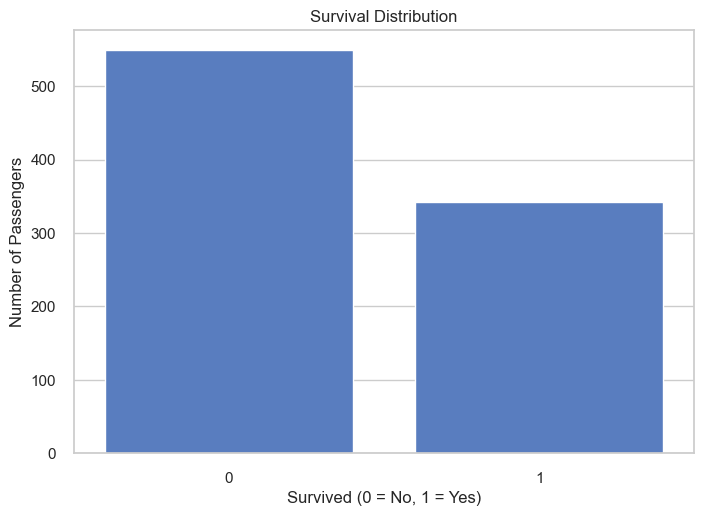

In [17]:
sns.barplot(data=df, x="Survived", y="count")
plt.title("Survival Distribution")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Number of Passengers")
plt.show()



In [18]:
query = """
SELECT pclass, AVG(fare) AS avg_fare
FROM train
GROUP BY pclass;
"""
df = pd.read_sql(query, conn)


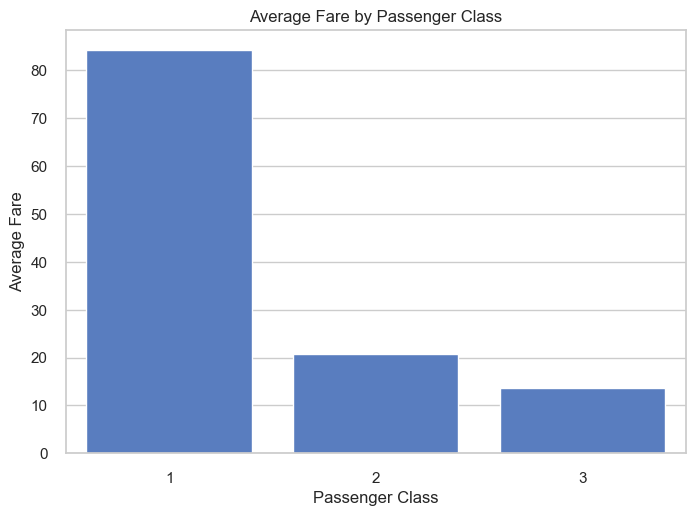

In [20]:
sns.barplot(data=df, x="Pclass", y="avg_fare")
plt.title("Average Fare by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Average Fare")
plt.show()


In [21]:
query = """
SELECT age
FROM train
WHERE age IS NOT NULL;
"""
df = pd.read_sql(query, conn)


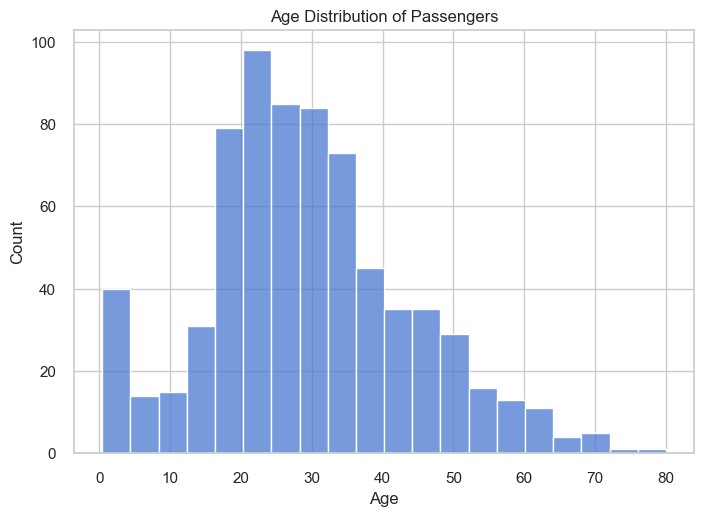

In [23]:
sns.histplot(df["Age"], bins=20)
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


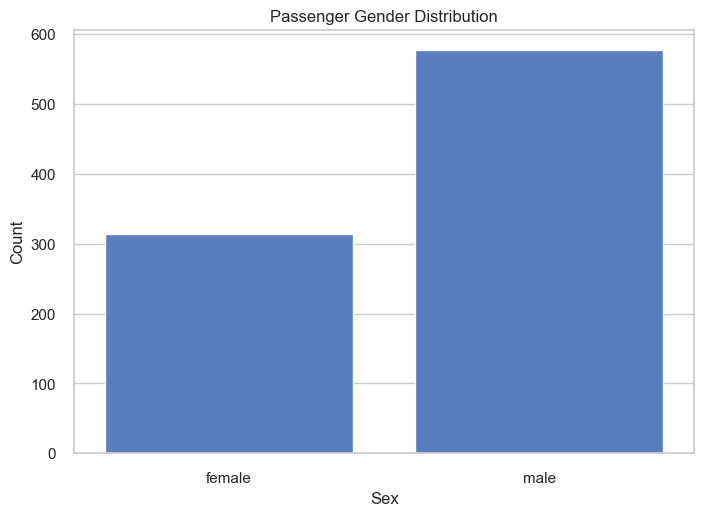

In [25]:
query = """
SELECT sex, COUNT(*) AS cnt
FROM train
GROUP BY sex;
"""
df = pd.read_sql(query, conn)

sns.barplot(data=df, x="Sex", y="cnt")
plt.title("Passenger Gender Distribution")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()
